In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.stats as stats 
import os
import csv
from pathlib import Path

stroke_data_to_load = Path("../Resources/Clean_Stroke_Data.csv")

# Read in the data. 
clean_stroke_df = pd.read_csv(stroke_data_to_load)
clean_stroke_df.head()


,ID,Gender,Age,Hypertension,Heart Disease,Residence Type,BMI,Smoking Status,Stroke
0,9046,Male,67,0,1,Urban,36.6,formerly smoked,1
1,31112,Male,80,0,1,Rural,32.5,never smoked,1
2,60182,Female,49,0,0,Urban,34.4,smokes,1
3,1665,Female,79,1,0,Rural,24.0,never smoked,1
4,56669,Male,81,0,0,Urban,29.0,formerly smoked,1


## Data Analysis
### Question: Is the rate of stroke higher in males who are older than 60 vs males between ages 20 - 59? For this combined population, does smoking status have an impact on the rate of stroke?

##### Part 1 of the analysis seeks to compare the risk of stroke, based on gender and age as factors. 


The first visualization captures the rate of stroke for males over 60 years old. This indicates that 12.4% of males in this population had a stroke, versus 87.6% of males in this population who did not have a stroke. 
The second visualization captures the rate of stroke for males between 20 - 59 years old. Findings indicate only 2.3% of males had a stroke, and 97.7% of males in this population group that did not have a stroke. 

When combining the datasets to compare both age groups (60+ and 20 - 59), we can conclude based on the statistics that males over 60 years old are at a greater risk for stroke, with 4.4% having had a stroke. Males ages 20 - 59 years old who had a stroke is only 1.5%

-------------------------------------------------------------------------------------------------------------------------------------------------------------
##### Part 2 of the analysis seeks to determine if there is a correlation between smoking status and an increased risk of stroke for males over 20 years old.

For part two of the analysis, only gender and smoking status are considered in determining the subset of the population from the dataset, looking at all males over the age of 20 to calculate the rate of stroke based on smoking status. There are a total of 855 male smokers and non-smokers in this population. Based on the data, there are 21 male smokers who had a stroke versus 25 male non-smokers who had a stroke. 
When calculating the rate of stroke based on smoking status, it was determined that the rate of stroke for non-smokers is 3%, while the rate of stroke for smokers is 2%. The additional statistical analysis with an independent t-test was performed, producing a p-value of 0.160. Because this is greater than a p-value of 0.05, this indicates very low correlation between smoking status and the risk of stroke. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------
##### Data Limitations:
The limitations of this dataset include a lack of information about where the sample population comes from (i.e, where they live, access to prevention and healthcare services, etc), as this information would prove useful in determining other contributing risks. 

Additionally, other comorbidities that may have an impact on the rate of stroke are not available. While this question looks specifically at age and smoking status, it is clinically relevant to understand any other medical history, current diagnoses, and family history that may cause an increased risk of stroke outside of/or in addition to age and smoking status. 

Lastly, additional information on the timeline and order of events regarding stroke vs diagnosis of available risk factors is not avialalbe, as well as how long the population has had a specific diagnosis. 


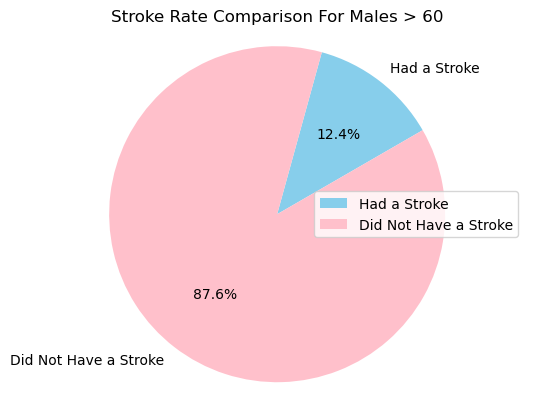

There are a total of 533 males in the 60+ Population
12.4 % of males over 60 had a stroke
87.6 % of males over 60 did not have a stroke


In [193]:
# Create a new data frame for males over 60 who had a stroke
males_over_60 = clean_stroke_df.loc[(clean_stroke_df['Gender'] == 'Male') & (clean_stroke_df['Age'] >= 60)]

# Calculate totals and create variables for each df
strokes_df = len(males_over_60[males_over_60['Stroke'] == 1])
no_strokes_df = len(males_over_60[males_over_60['Stroke'] == 0])

# Calculate totals for population and percentage makeup of each group
total = strokes_df + no_strokes_df
percent_strokes = (strokes_df/total) * 100
percent_no_stroke = (no_strokes_df/total) * 100

# Round variables for graph and output
rounded_stroke = round(percent_strokes,1)
rounded_nostroke = round(percent_no_stroke,1)

# Create variables for pie chart
combined_data = [percent_strokes, percent_no_stroke]
plt.title("Stroke Rate Comparison For Males > 60")
colors = ['skyblue', 'pink']
labels = ['Had a Stroke', 'Did Not Have a Stroke']

#Create pie chart of data
plt.pie(combined_data, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=30)
plt.axis('equal')
plt.legend()
plt.show()

# Print Data Findings
print(f'There are a total of {total} males in the 60+ Population')
print(f'{rounded_stroke} % of males over 60 had a stroke')
print(f'{rounded_nostroke} % of males over 60 did not have a stroke')

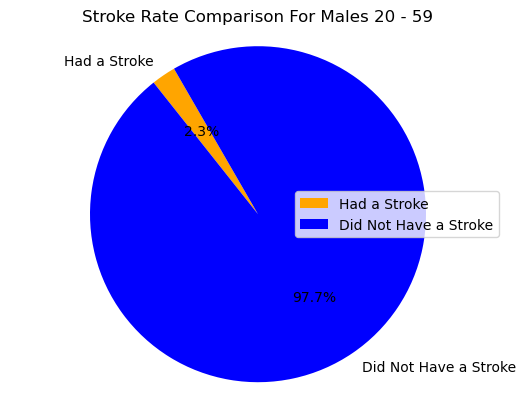

There are a total of 983 males in the 20-59 Population
2.3 % of males ages 20-59 had a stroke
97.7 % of males between ages 20-59 did not have a stroke


In [230]:
# Filter Data Frame based on age
males_under_60 = clean_stroke_df[(clean_stroke_df['Gender'] == 'Male') & (clean_stroke_df['Age'] >20) & (clean_stroke_df['Age'] <= 59)]

# Calculate totals and create variables for each df
strokes_df2 = len(males_under_60[males_under_60['Stroke'] == 1])
no_strokes_df2 = len(males_under_60[males_under_60['Stroke'] == 0])

# Calculate totals for population and percentage makeup of each group
total2 = strokes_df2 + no_strokes_df2
percent_strokes2 = (strokes_df2/total2) * 100
percent_no_stroke2 = (no_strokes_df2/total2) * 100

# Round variables for graph and output
rounded_stroke2 = round(percent_strokes2,1)
rounded_nostroke2 = round(percent_no_stroke2,1)

# Create variables for pie chart
combined_data2 = [percent_strokes2, percent_no_stroke2]
plt.title("Stroke Rate Comparison For Males 20 - 59")
colors = ['orange', 'blue']
labels = ['Had a Stroke', 'Did Not Have a Stroke']

#Create pie chart of data
plt.pie(combined_data2, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=120)
plt.axis('equal')
plt.legend()
plt.show()

# Print Data Findings
print(f'There are a total of {total2} males in the 20-59 Population')
print(f'{rounded_stroke2} % of males ages 20-59 had a stroke')
print(f'{rounded_nostroke2} % of males between ages 20-59 did not have a stroke')


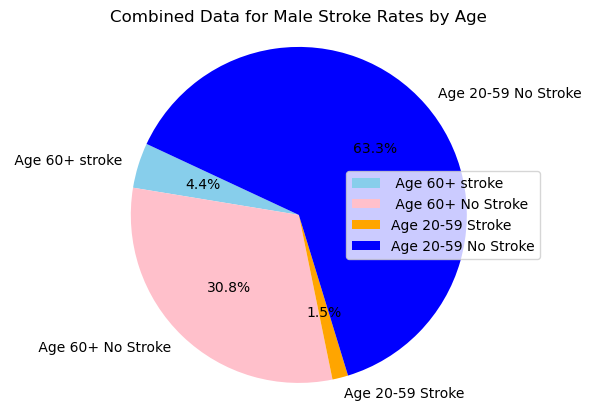

There are a total of 1516 males in the combined population
4.4 % of males over 60 had a stroke
1.5 % of males between 20 - 59 years old that had a stroke


In [195]:
# Create third pie chart to combine data

# chart setupand variables
all_data = [percent_strokes, percent_no_stroke, percent_strokes2, percent_no_stroke2]
colors2 = ['skyblue', 'pink', 'orange', 'blue']
labels2 = [' Age 60+ stroke', ' Age 60+ No Stroke', 'Age 20-59 Stroke', 'Age 20-59 No Stroke']

# New calculations for combined populations
all_males = total + total2
stroke1 = (strokes_df/all_males) * 100
stroke2 = (no_strokes_df/all_males) * 100
stroke3 = (strokes_df2/all_males) * 100
stroke4 = (no_strokes_df2/all_males) * 100

# Combine data points for plotting
all_combined = [stroke1, stroke2, stroke3, stroke4]

# Round variables for graph and data output
rounded_stroke1 = round(stroke1,1)
rounded_stroke2 = round(stroke2,1)
rounded_stroke3 = round(stroke3,1)
rounded_stroke4 = round(stroke4,1)

#Create pie chart of data
plt.pie(all_combined, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=False, startangle=155)
plt.title('Combined Data for Male Stroke Rates by Age')
plt.axis('equal')
plt.legend()
plt.show()

# Print Data Findings
print(f'There are a total of {all_males} males in the combined population')
print(f'{rounded_stroke1} % of males over 60 had a stroke')
print(f'{rounded_stroke3} % of males between 20 - 59 years old that had a stroke')

In [244]:
# Perform independent t-test to determine statistical significance of age on the risk of stroke
male_pop = males_over_60['Stroke']
male_pop2 = males_under_60['Stroke'] 
ttest = stats.ttest_ind(male_pop, male_pop2, equal_var=False)

print(f'Results = {ttest}. While males older than 60 do appear to have a higher rate of stroke, when looking at the overall data the p-value >0.05, this indicates there does not appear to be a significant correlation between age and stroke')

Results = Ttest_indResult(statistic=6.662732641286154, pvalue=5.698678141910369e-11). While males older than 60 do appear to have a higher rate of stroke, when looking at the overall data the p-value >0.05, this indicates there does not appear to be a significant correlation between age and stroke


There are a total of 855 male smokers and non-smokers in this population
There are 21 male smokers who had a stroke
There are 25 male non-smokers who had a stroke
There are 282 male smokers who DID NOT have a stroke
There are 527 male non-smokers who DID NOT have a stroke
The rate of stroke for smokers is 2 %
The rate of stroke for non-smokers is 3 %


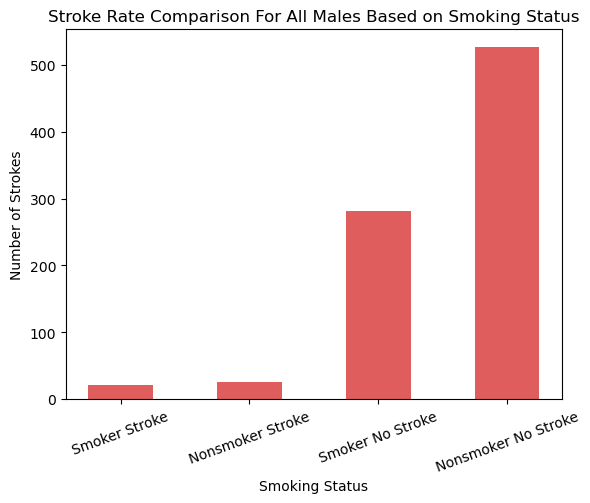

In [196]:
# Filter Data Frame based on age
#all_males = clean_stroke_df[(clean_stroke_df['Gender'] == 'Male') & (clean_stroke_df['Age'] > 20)]
male_smokers = clean_stroke_df[(clean_stroke_df['Gender'] == 'Male') & (clean_stroke_df['Age'] > 20) & (clean_stroke_df['Smoking Status'] == 'smokes')]
male_non_smokers = clean_stroke_df[(clean_stroke_df['Gender'] == 'Male') & (clean_stroke_df['Age'] > 20) & (clean_stroke_df['Smoking Status'] == 'never smoked')]

# Calculate totals and create variables for each df
smoker_stroke = len(male_smokers[male_smokers['Stroke'] == 1])
non_smoker_stroke = len(male_non_smokers[male_non_smokers['Stroke'] == 1])
smoker_no_stroke = len(male_smokers[male_smokers['Stroke'] == 0])
non_smoker_no_stroke = len(male_non_smokers[male_non_smokers['Stroke'] == 0])

# Additional calculations for statistical analysis
smoker_total = smoker_stroke + non_smoker_stroke + smoker_no_stroke + non_smoker_no_stroke
smoker_rate = round((smoker_stroke/smoker_total) * 100)
non_smoker_rate = round((non_smoker_stroke/smoker_total) * 100)

# Create variables for bar chart
combined_data3 = ['Smoker Stroke', 'Nonsmoker Stroke', 'Smoker No Stroke', 'Nonsmoker No Stroke']
total_males = [smoker_stroke, non_smoker_stroke, smoker_no_stroke, non_smoker_no_stroke]
plt.title("Stroke Rate Comparison For All Males Based on Smoking Status")

#Create pie chart of data
plt.bar(combined_data3, total_males, facecolor='C3', alpha=0.75, align='center', width=0.5)
plt.xlabel("Smoking Status")
plt.ylabel("Number of Strokes")
plt.xticks(rotation=20)
plt.show

# Print data findings
print(f'There are a total of {smoker_total} male smokers and non-smokers in this population')
print(f'There are {smoker_stroke} male smokers who had a stroke')
print(f'There are {non_smoker_stroke} male non-smokers who had a stroke')
print(f'There are {smoker_no_stroke} male smokers who DID NOT have a stroke')
print(f'There are {non_smoker_no_stroke} male non-smokers who DID NOT have a stroke')
print(f'The rate of stroke for smokers is {smoker_rate} %')
print(f'The rate of stroke for non-smokers is {non_smoker_rate} %')


In [235]:
# Perform independent t-test to determine statistical significance of smoking impact on the risk of stroke
pop1 = male_smokers['Stroke']
pop2 = male_non_smokers['Stroke']
significance = stats.ttest_ind(pop1, pop2, equal_var=False)

print(f'Results = {significance}. Based on the p-value >0.05, this indicates there is no statistical significance between smoking status and stroke')

Results = Ttest_indResult(statistic=1.4053467554247856, pvalue=0.1605087790123958). Based on the p-value >0.05, this indicates there is no statistical significance between smoking status and stroke
